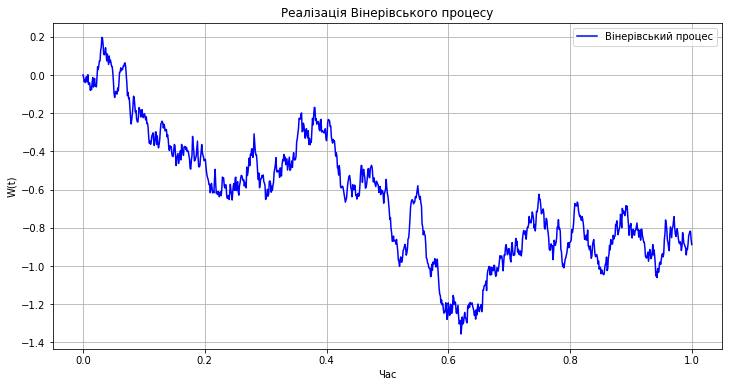

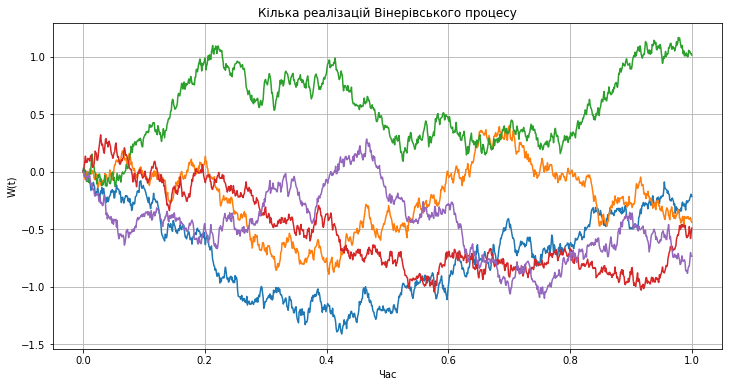

In [3]:
import numpy as np
import matplotlib.pyplot as plt

T = 1.0           
N = 1000           
dt = T / N        
time_grid = np.linspace(0, T, N + 1)  

dW = np.random.normal(0, np.sqrt(dt), N)  
W = np.concatenate(([0], np.cumsum(dW)))  

plt.figure(figsize=(12, 6))
plt.plot(time_grid, W, color="blue", label="Вінерівський процес")
plt.xlabel("Час")
plt.ylabel("W(t)")
plt.title("Реалізація Вінерівського процесу")
plt.legend()
plt.grid()
plt.show()

num_paths = 5  

plt.figure(figsize=(12, 6))
for _ in range(num_paths):
    dW = np.random.normal(0, np.sqrt(dt), N)
    W = np.concatenate(([0], np.cumsum(dW)))
    plt.plot(time_grid, W)

plt.xlabel("Час")
plt.ylabel("W(t)")
plt.title("Кілька реалізацій Вінерівського процесу")
plt.grid()
plt.show()


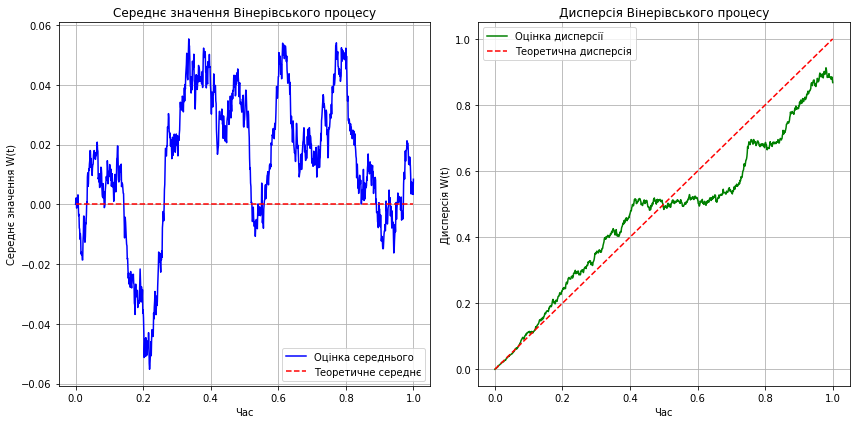

In [5]:
import numpy as np
import matplotlib.pyplot as plt

T = 1.0            
N = 1000           
dt = T / N         
time_grid = np.linspace(0, T, N + 1)  #
num_realizations = 100  

all_paths = np.zeros((num_realizations, N + 1))
for i in range(num_realizations):
    dW = np.random.normal(0, np.sqrt(dt), N)  
    W = np.concatenate(([0], np.cumsum(dW))) 
    all_paths[i] = W

mean_estimate = np.mean(all_paths, axis=0)
variance_estimate = np.var(all_paths, axis=0)

theoretical_mean = np.zeros(N + 1)
theoretical_variance = time_grid

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(time_grid, mean_estimate, label="Оцінка середнього", color="blue")
plt.plot(time_grid, theoretical_mean, "--", label="Теоретичне середнє", color="red")
plt.xlabel("Час")
plt.ylabel("Середнє значення W(t)")
plt.title("Середнє значення Вінерівського процесу")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(time_grid, variance_estimate, label="Оцінка дисперсії", color="green")
plt.plot(time_grid, theoretical_variance, "--", label="Теоретична дисперсія", color="red")
plt.xlabel("Час")
plt.ylabel("Дисперсія W(t)")
plt.title("Дисперсія Вінерівського процесу")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


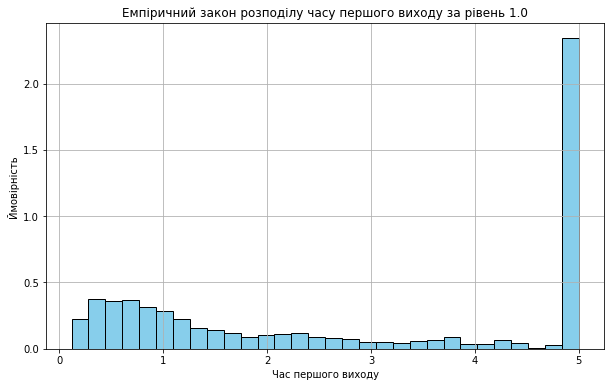

In [7]:
import numpy as np
import matplotlib.pyplot as plt


T = 5.0             
N = 1000            
dt = T / N          
time_grid = np.linspace(0, T, N + 1)  
L = 1.0             
num_realizations = 1000  

first_exit_times = []
for i in range(num_realizations):
    dW = np.random.normal(0, np.sqrt(dt), N)  
    W = np.concatenate(([0], np.cumsum(dW)))  

    exit_time = np.where(W >= L)[0]
    if len(exit_time) > 0:
        first_exit_times.append(time_grid[exit_time[0]])
    else:
        first_exit_times.append(T)  

plt.figure(figsize=(10, 6))
plt.hist(first_exit_times, bins=30, density=True, color="skyblue", edgecolor="black")
plt.xlabel("Час першого виходу")
plt.ylabel("Ймовірність")
plt.title(f"Емпіричний закон розподілу часу першого виходу за рівень {L}")
plt.grid(True)
plt.show()
